In [99]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import datasets

In [100]:
iris = datasets.load_iris()

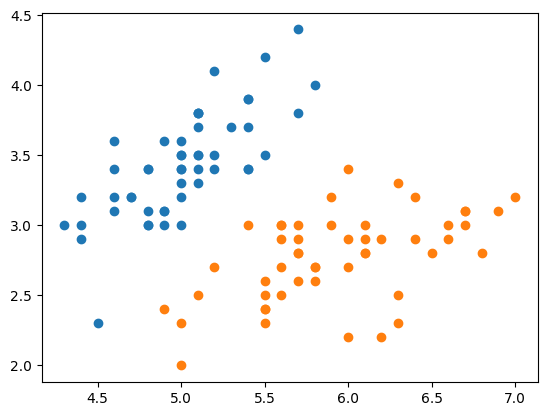

In [101]:
x = iris.data
y = iris.target
# 只做一个简单的二分类
x = x[y<2, :2]
y = y[y<2]

plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()


In [102]:
data_class1 = np.hstack((x[y==0,0].reshape(-1,1),x[y==0,1].reshape(-1,1)))
data_class2 = np.hstack((x[y==1,0].reshape(-1,1),x[y==1,1].reshape(-1,1)))

In [103]:
data_class1 = np.hstack((np.ones(data_class1.shape[0]).reshape(-1,1),data_class1)) #增广样本矩阵
data_class2 = np.hstack((np.ones(data_class2.shape[0]).reshape(-1,1),data_class2)) * -1

In [104]:
a = np.ones(data_class1.shape[1])

In [105]:
n_w = 1 #分类错误数量
alpha = 0.05 #学习率

In [106]:
combined_data = np.concatenate((data_class1, data_class2), axis=0)

# 打乱数据顺序
np.random.shuffle(combined_data)

In [107]:
num = 0 #轮数
while n_w != 0:
    num += 1
    n_w = 0
    site = 0
    for i in combined_data:
        if np.dot(i,a) <= 0:
            n_w += 1
            site -= i
        a += alpha * site
    if num % 100 == 0:
        print(a,np.dot(i,a))

[13361.  79396.5 36995.5] 517089.9000000064
[ 26721. 158792.  73990.] 1034170.8000000055
[ 40081.         238187.50000002 110984.49999999] 1551251.7000000859
[ 53441.         317583.00000003 147978.99999999] 2068332.6000000995
[ 66801.         396978.50000002 184973.5       ] 2585413.500000107
[ 80160.99999999 476374.00000002 221968.00000001] 3102494.4000001065
[ 93520.99999998 555769.50000004 258962.50000002] 3619575.300000217
[106880.99999997 635165.00000009 295957.        ] 4136656.200000427
[120240.99999996 714560.50000015 332951.49999998] 4653737.10000063
[133600.99999996 793956.0000002  369945.99999997] 5170818.000000835
[146960.99999996 873351.50000025 406940.49999995] 5687898.900001049
[160320.99999996 952747.00000031 443934.99999993] 6204979.800001262
[ 173680.99999996 1032142.50000036  480929.49999992] 6722060.700001475
[ 187040.99999996 1111538.00000031  517923.9999999 ] 7239141.600001149
[ 200400.99999996 1190933.50000022  554918.49999992] 7756222.500000795
[ 213760.9999999

KeyboardInterrupt: 

数据集太复杂，拟合无法收敛